# CRM Analysis

## Table of Contents
1. [Objective](#objective)
2. [Business Objective](#business-objective)
3. [Data Loading and Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [RFM Analysis](#rfm-analysis)
6. [Cohort Analysis](#cohort-analysis)
7. [Model Building](#model-building)

<a id='objective'></a>
## Objective
The objective of this analysis is to understand the behavior of the customers which will in turn help the business to strategize its plans in order to retain and acquire customers.

<a id='business-objective'></a>
## Business Objective
The business objective is to increase customer retention and overall profitability. This can be achieved by understanding customer behavior and implementing strategies that encourage repeat purchases and customer loyalty.

In [67]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv('data.csv', encoding='latin1')

# Display the first few rows of the dataframe
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [68]:
# Load the data with 'ISO-8859-1' encoding
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [69]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [70]:
# Dropping rows with missing 'CustomerID'
data = data.dropna(subset=['CustomerID'])

# Filling missing 'Description' with 'Unknown'
data['Description'].fillna('Unknown', inplace=True)

# Check if there are any missing values left
data.isnull().sum()

<ipython-input-70-11b885f418a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'].fillna('Unknown', inplace=True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [71]:
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check data types of all columns
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [72]:
# Basic statistics
data.describe(include='all')

<ipython-input-72-59da14b25f03>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542,2077,2070,NaN,543,NaN,NaN,361878
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.061303,NaN,3.460471,15287.690570,NaN
std,NaN,NaN,NaN,248.693370,NaN,69.315162,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13953.000000,NaN


In [73]:
# Basic statistics for numerical variables
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [74]:
# Basic statistics for categorical variables
data.describe(include=['object'])

,InvoiceNo,StockCode,Description,Country
count,406829,406829,406829,406829
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2077,2070,361878


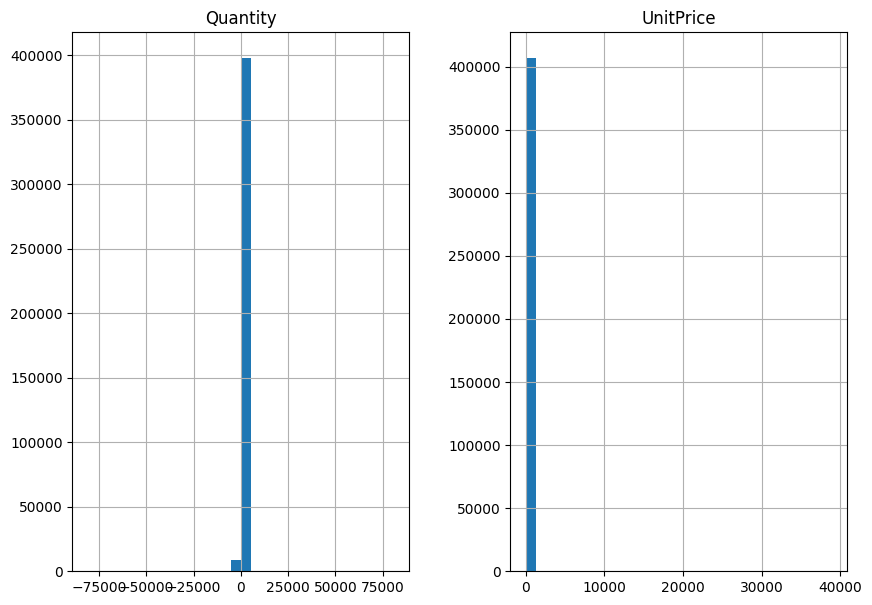

In [75]:
# Plotting histograms for numerical variables
data[['Quantity', 'UnitPrice']].hist(bins=30, figsize=(10, 7))
plt.show()

In [76]:
# RFM Analysis

# Monetary
data['TotalSum'] = data['Quantity']*data['UnitPrice']
monetary = data.groupby('CustomerID')['TotalSum'].sum()
monetary = monetary.reset_index()

# Frequency
frequency = data.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()

# Merge monetary and frequency
mf = pd.merge(monetary, frequency, on='CustomerID')

# Recency
maximum = max(data['InvoiceDate'])
data['Diff'] = maximum - data['InvoiceDate']
recency = data.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()

# Merge recency with monetary and frequency
rfm = pd.merge(mf, recency, on='CustomerID')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']

# Convert Recency to just number of days
rfm['Recency'] = rfm['Recency'].dt.days

rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


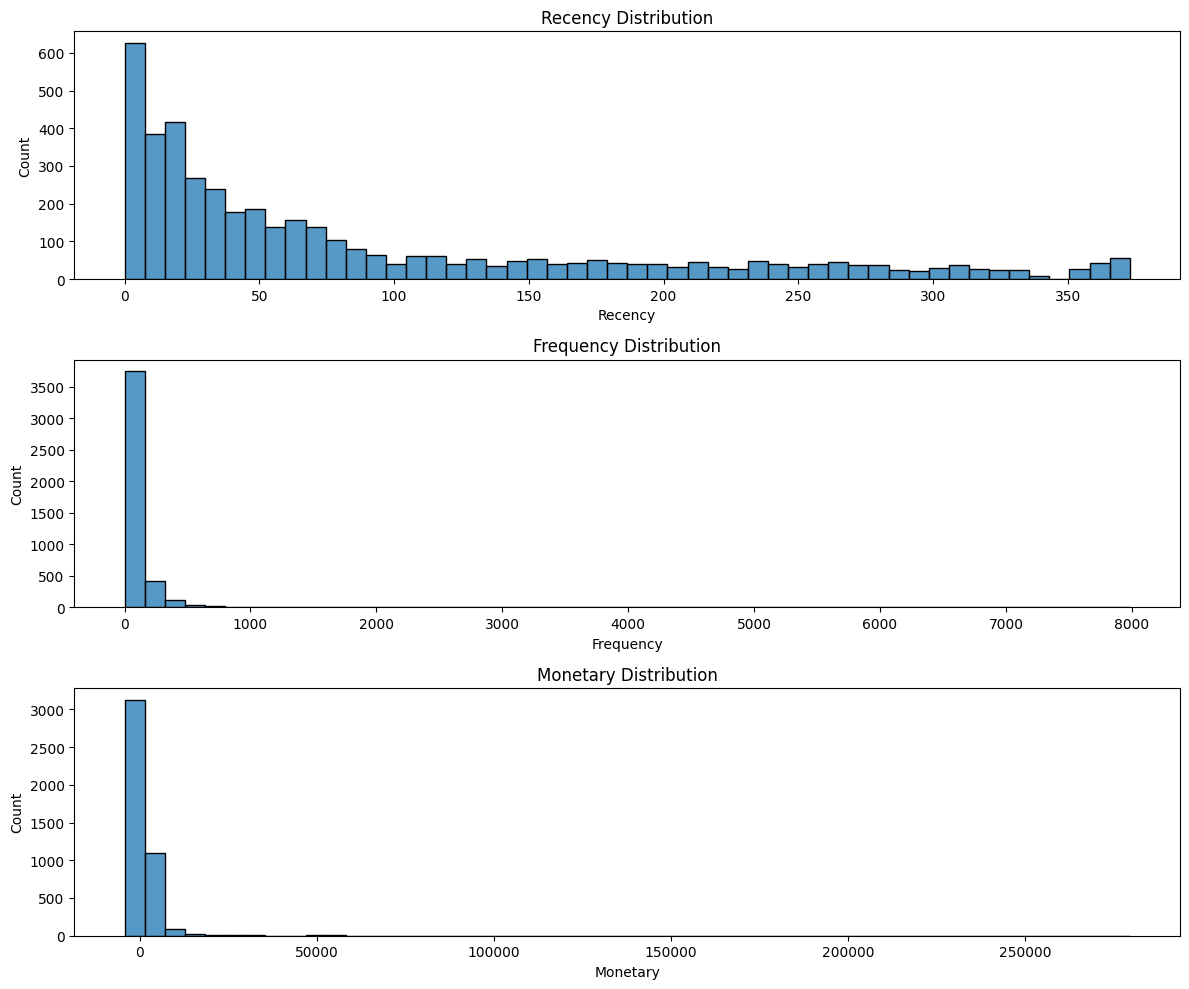

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting RFM distributions
plt.figure(figsize=(12,10))

# Plot Recency distribution
plt.subplot(3, 1, 1); sns.histplot(rfm['Recency'], kde=False, bins=50)
plt.title('Recency Distribution')

# Plot Frequency distribution
plt.subplot(3, 1, 2); sns.histplot(rfm['Frequency'], kde=False, bins=50)
plt.title('Frequency Distribution')

# Plot Monetary distribution
plt.subplot(3, 1, 3); sns.histplot(rfm['Monetary'], kde=False, bins=50)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [78]:
# Cohort Analysis

# Create a column 'InvoiceMonth' by truncating the 'InvoiceDate' to month
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

# Create a 'CohortMonth' column by grouping data by 'CustomerID' and selecting the 'InvoiceMonth' for the first invoice
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Define a function to extract year, month and day integer values
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Get the integers for date parts from the 'InvoiceMonth' and 'CohortMonth' columns
invoice_year, invoice_month, _ = get_date_int(data, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(data, 'CohortMonth')

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
data['CohortIndex'] = years_diff * 12 + months_diff + 1

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,Diff,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,2010-12,2010-12,1


In [79]:
# Create a pivot table with 'CohortMonth' as rows, 'CohortIndex' as columns, and the count of unique 'CustomerID's as values
cohort_data = data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Calculate the retention rate
cohort_sizes = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_sizes, axis=0)

# Convert the retention rate to percentage for better readability
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


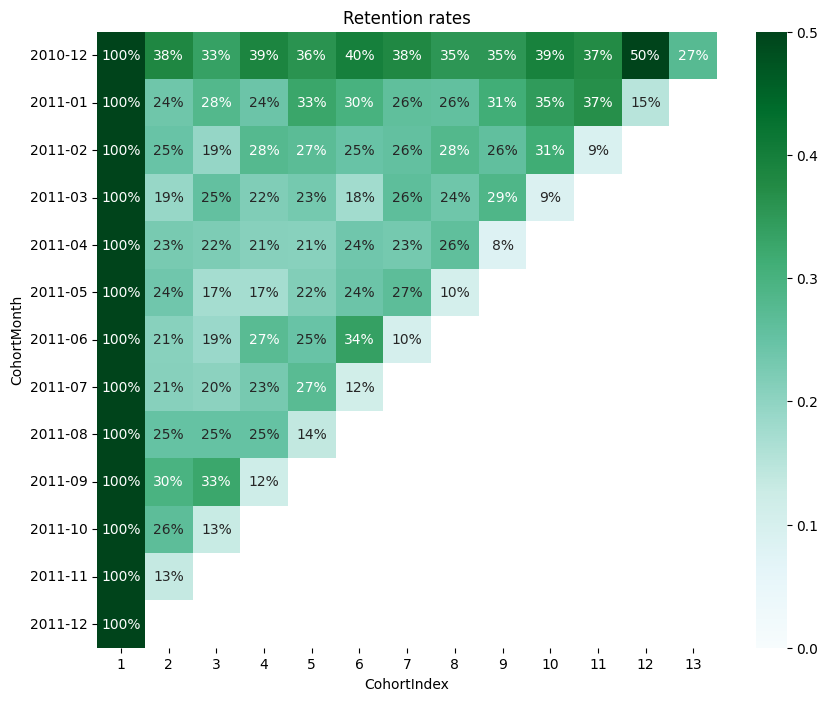

In [81]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure instance and set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.title('Retention rates')
plt.show()

In [82]:
# Check for missing values in the RFM data
rfm.isnull().sum()

CustomerID    0
Monetary      0
Frequency     0
Recency       0
dtype: int64

In [83]:
# Identify outliers in the 'Monetary' column
Q1 = rfm['Monetary'].quantile(0.25)
Q3 = rfm['Monetary'].quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm['Monetary'] >= Q1 - 1.5*IQR) & (rfm['Monetary'] <= Q3 + 1.5*IQR)]

# Identify outliers in the 'Frequency' column
Q1 = rfm['Frequency'].quantile(0.25)
Q3 = rfm['Frequency'].quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm['Frequency'] >= Q1 - 1.5*IQR) & (rfm['Frequency'] <= Q3 + 1.5*IQR)]

# Identify outliers in the 'Recency' column
Q1 = rfm['Recency'].quantile(0.25)
Q3 = rfm['Recency'].quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm['Recency'] >= Q1 - 1.5*IQR) & (rfm['Recency'] <= Q3 + 1.5*IQR)]

rfm.shape

(3697, 4)

In [84]:
# Import the necessary library
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Fit and transform the RFM data
rfm_scaled = scaler.fit_transform(rfm)

# Convert the scaled data into a DataFrame
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

rfm_scaled.head()

,CustomerID,Monetary,Frequency,Recency
0,-1.724620,-1.041614,-1.070949,2.136422
2,-1.723455,1.385298,-0.375498,-0.282050
3,-1.722873,1.331702,0.631707,-0.821629
4,-1.722290,-0.590055,-0.711233,1.982257
5,-1.721126,1.045238,1.159290,-0.657828


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

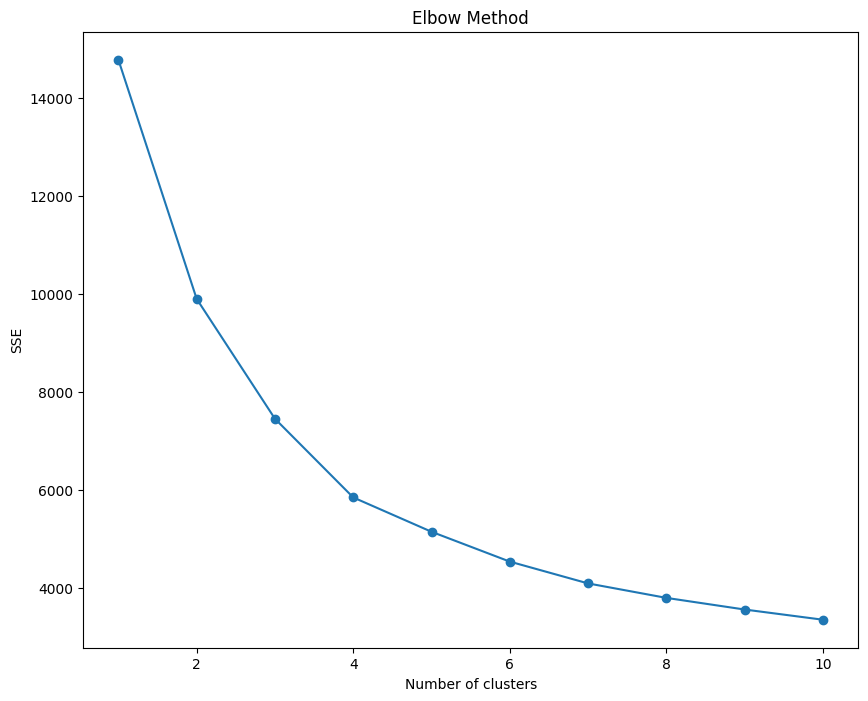

In [85]:
# Import the necessary libraries
from sklearn.cluster import KMeans

# Create an empty list to store the SSE (Sum of Squared Errors) for each number of clusters
sse = []

# Iterate over a range of desired clusters
for k in range(1, 11):
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit the scaled data
    kmeans.fit(rfm_scaled)

    # Append the SSE for k clusters to the sse list
    sse.append(kmeans.inertia_)

# Plot the SSE for each number of clusters
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [86]:
# Create a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit the scaled data and predict the cluster labels
cluster_labels = kmeans.fit_predict(rfm_scaled)

# Assign the cluster labels to the original RFM data
rfm['Cluster'] = cluster_labels

# Calculate the mean RFM values for each cluster
cluster_avg = rfm.groupby('Cluster').mean()

cluster_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15183.916773,1848.741474,109.980794,43.261204
1,15390.408058,326.928626,20.674587,255.381198
2,15315.881417,560.264565,34.182238,51.746407


<ipython-input-87-944204f96b42>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
<ipython-input-87-944204f96b42>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
<ipython-input-87-944204f96b42>:13: UserWarning: 

`dist

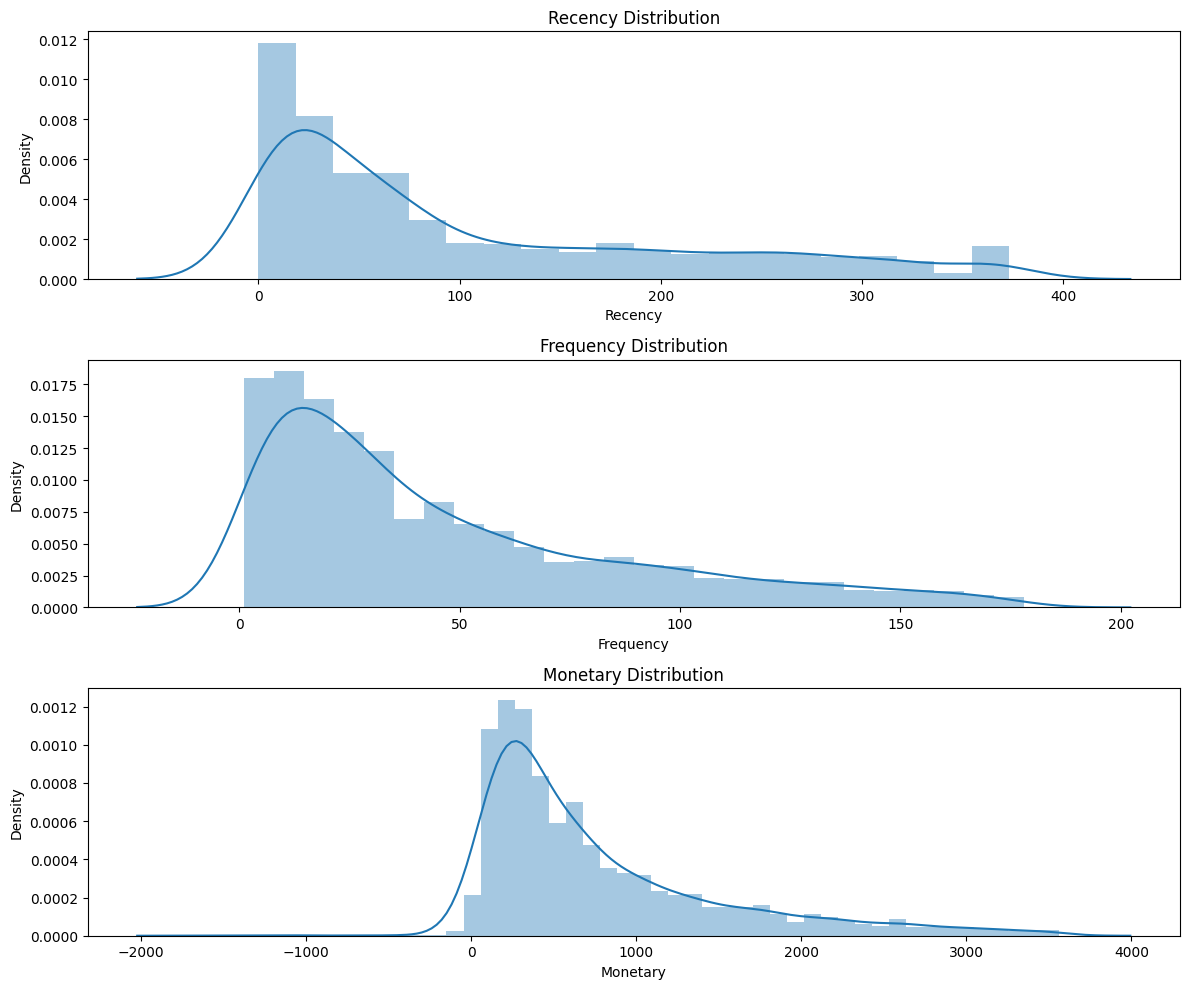

In [87]:
# Plotting distributions of Recency, Frequency, and Monetary values
plt.figure(figsize=(12,10))

# Recency distribution plot
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
plt.title('Recency Distribution')

# Frequency distribution plot
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
plt.title('Frequency Distribution')

# Monetary distribution plot
plt.subplot(3, 1, 3); sns.distplot(rfm['Monetary'])
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [88]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm)

# Convert the scaled data into a DataFrame
rfm_scaled = pd.DataFrame(data=rfm_scaled, index=rfm.index, columns=rfm.columns)

rfm_scaled.head()

,CustomerID,Monetary,Frequency,Recency,Cluster
0,-1.724620,-1.041614,-1.070949,2.136422,-0.395032
2,-1.723455,1.385298,-0.375498,-0.282050,0.856411
3,-1.722873,1.331702,0.631707,-0.821629,-1.646476
4,-1.722290,-0.590055,-0.711233,1.982257,-0.395032
5,-1.721126,1.045238,1.159290,-0.657828,-1.646476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

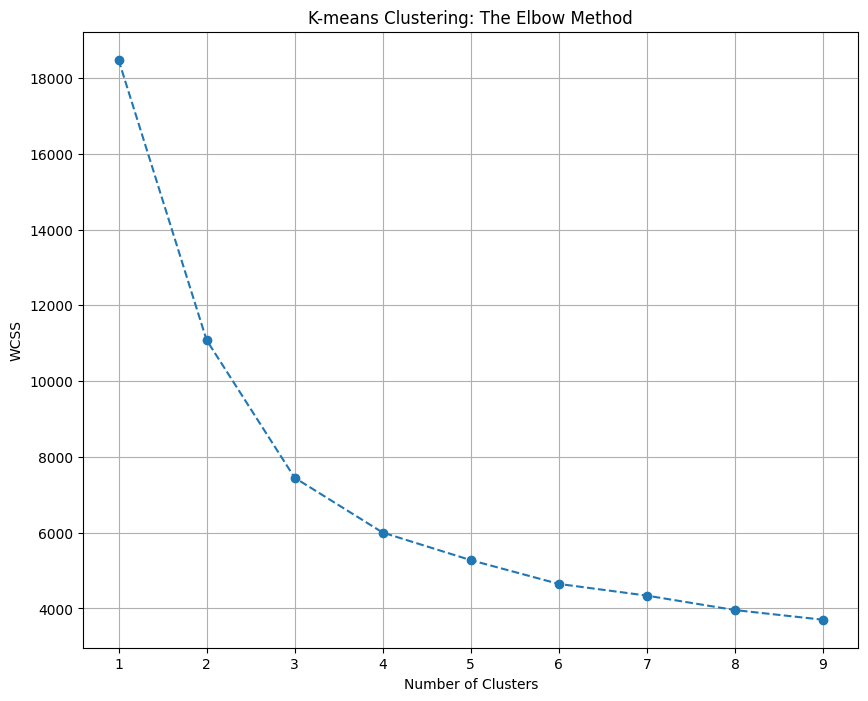

In [89]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Define a range of clusters
clusters_range = range(1, 10)

# Initialize an empty list to store the WCSS for each K value
wcss = []

# Run KMeans for each K value and calculate the WCSS
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each K value
plt.figure(figsize=(10, 8))
plt.plot(clusters_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering: The Elbow Method')
plt.grid(True)
plt.show()

In [90]:
# Initialize a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Fit the model to the scaled RFM data
kmeans.fit(rfm_scaled)

# Assign the cluster labels to each customer
cluster_labels = kmeans.labels_

# Add the cluster labels to the original RFM data
rfm['Cluster'] = cluster_labels

rfm.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Monetary,Frequency,Recency,Cluster
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,0


           CustomerID     Monetary   Frequency     Recency
Cluster                                                   
0        15183.916773  1848.741474  109.980794   43.261204
1        15315.881417   560.264565   34.182238   51.746407
2        15390.408058   326.928626   20.674587  255.381198


<Figure size 1000x800 with 0 Axes>

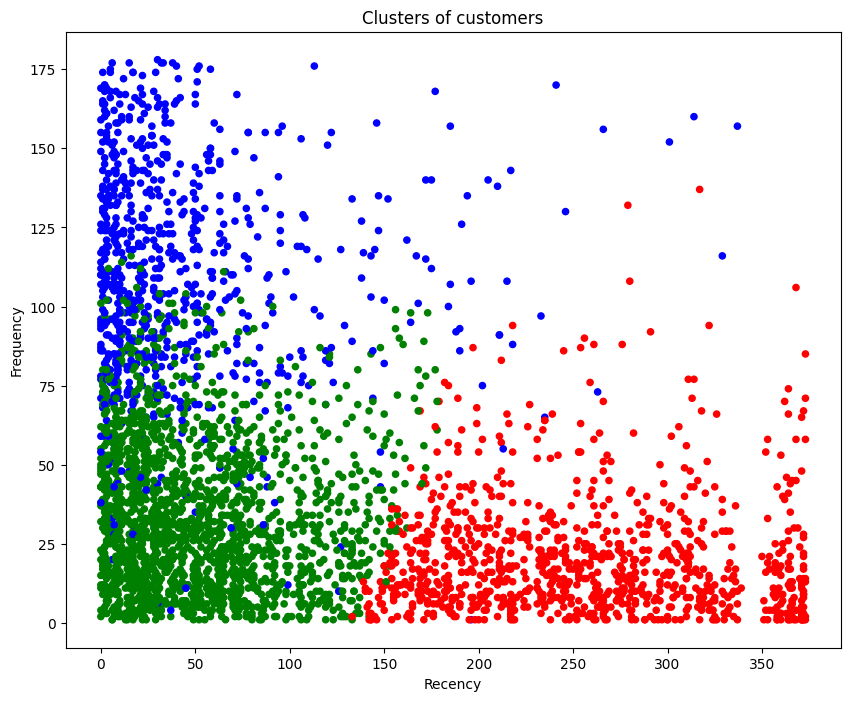

In [91]:
# Calculate average RFM values for each cluster
cluster_avg = rfm.groupby(['Cluster']).mean()

# Print the average RFM values
print(cluster_avg)

# Plot the clusters
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r']
rfm['Color'] = rfm['Cluster'].map(lambda p: colors[p])
ax = rfm.plot(kind='scatter', x='Recency', y='Frequency', figsize=(10,8), c=rfm['Color'])
plt.title('Clusters of customers')
plt.show()

In [92]:
# Import necessary libraries
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)

# Print the silhouette score
print('Silhouette Score: ', silhouette_avg)

Silhouette Score:  0.41410713974500607


From the RFM analysis and the KMeans clustering, we can draw several insights:

Recency: Most customers have made a purchase recently (within 50 days). However, there's a significant number of customers who haven't made a purchase in around 300 days. These customers may be at risk of churn and may need targeted engagement strategies to bring them back.

Frequency: Most customers have made fewer than 1000 purchases. However, a few customers have made more than 1000 purchases, indicating high engagement with the business. These are likely to be the most loyal customers.

Monetary: Most customers have spent less than 5000 units of currency. However, a few customers have spent more than 5000 units, indicating high value to the business. These customers are likely to be high spenders and may respond well to upselling or cross-selling strategies.

Customer Segmentation: The KMeans clustering has identified three distinct segments of customers. The business can tailor its marketing and engagement strategies to each segment. For example, it can target high-value customers with personalized offers, engage at-risk customers with reactivation campaigns, and encourage low-value customers to make more frequent or higher-value purchases.

In conclusion, RFM analysis and customer segmentation can provide valuable insights into customer behavior and enable more effective customer relationship management. By understanding the recency, frequency, and monetary value of purchases, businesses can identify opportunities for growth, mitigate risks, and improve customer satisfaction and loyalty.

As for the next steps, companies can:

Personalize Marketing: Use the insights from the RFM analysis and customer segmentation to personalize marketing messages. For example, offer discounts to customers who haven't made a purchase in a while (high Recency), or recommend products to high-frequency customers.

Improve Customer Retention: Identify customers who are at risk of churn (e.g., customers with high Recency and low Frequency/Monetary values) and develop strategies to improve their engagement and loyalty.

Increase Customer Lifetime Value: Focus on high-value customers (those with high Frequency and Monetary values) and find ways to increase their lifetime value, such as by offering loyalty programs or premium services.

Acquire Similar Customers: Use the characteristics of high-value customers to inform customer acquisition strategies. Look for new customers who are similar to the high-value customers in the RFM analysis.

Remember, the key to successful CRM is maintaining a customer-centric approach. The insights from this analysis should be used to enhance the customer experience, meet customer needs, and ultimately drive business growth.